<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Python for Visualisation - Week 3</center></h1>


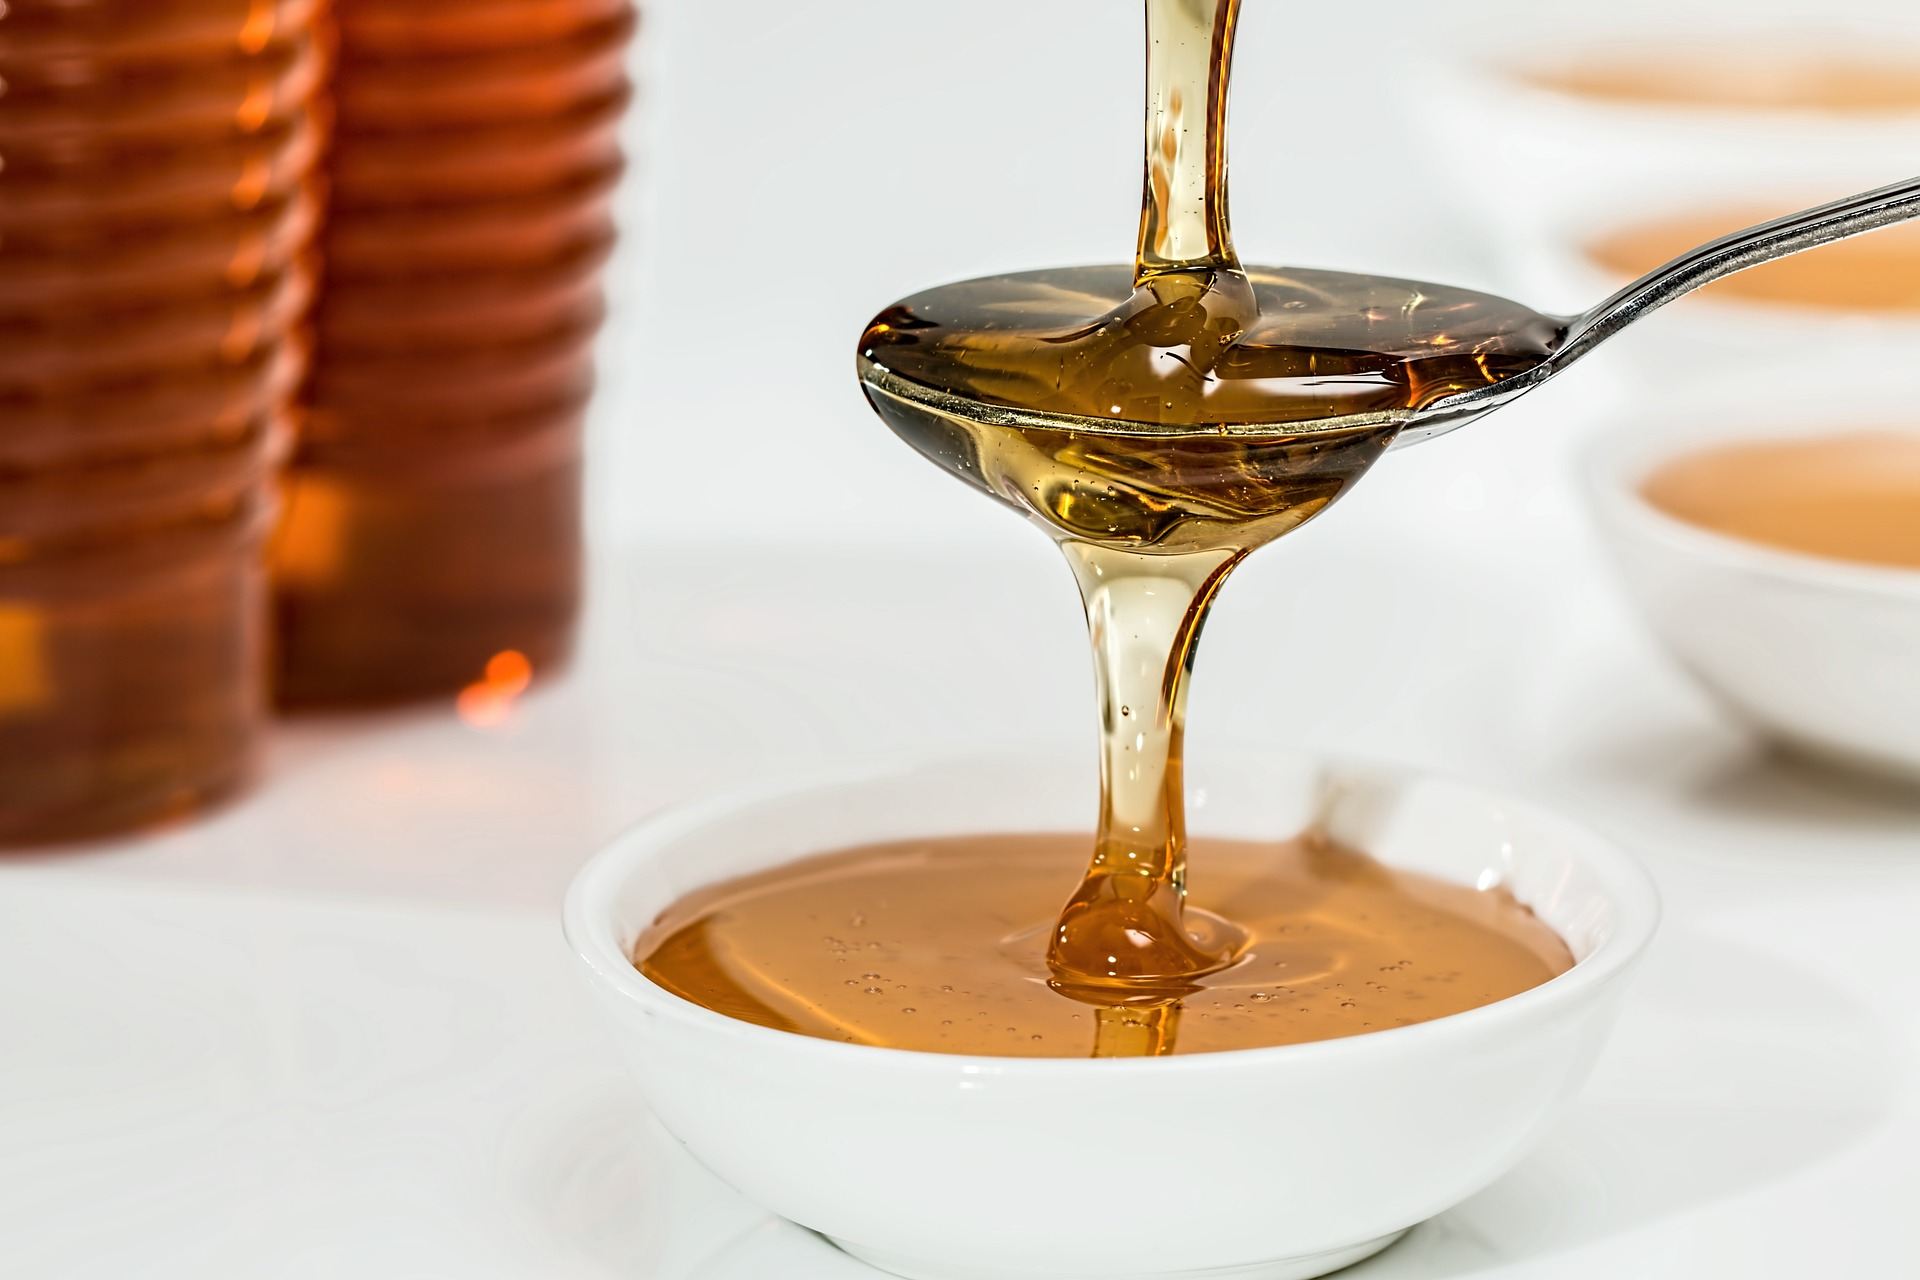
<b><center><font size=5> Honey Production Case Study </font></center></b>

# **Background**
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees that causes the remaining hive colonies to collapse. Speculation on the cause of this disorder points to hive diseases and pesticides harming the pollinators, tho no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Nowadays, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2016.

# **Objective**:
To visualize how honey production has changed over the years (1998–2016) in the United States.

Key questions to be answered:

* How has honey production yield changed from 1998 to 2016?
* Over time, what have been the major production trends across the states?
* Are there any pattern that can be observed between total honey production and the value of production every year? How has the value of production, which in some sense could be tied to demand, changed every year?

# **Dataset**:

* **State**: Various states in the U.S.
* **year**: Year of production
* **stocks**: Refers to stocks held by producers. Unit is pounds
* **numcol**: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
* **yieldpercol**: honey yield per colony. The unit is in pounds
* **totalprod**: Total production (numcol x yieldpercol). Unit is pounds
* **priceperlb**: Refers to average price per pound based on expanded sales. The unit is dollars.
* **prodvalue**: Value of production (totalprod x priceperlb). The unit is dollars.


Let's start by importing necessary libraries

## **Importing the necessary packages**

In [ ]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

## **Reading the datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

datasets = '/content/drive/MyDrive/datasets/'

In [ ]:
honeyprod = pd.read_csv(datasets+"honeyproduction1998-2016.csv")

## **Data Overview**

Let's start by performing basic steps to understand the data such as:
- observing the first few rows of the dataset
- getting information about the number of rows and columns
- finding out the data types of the columns
- checking the statistical summary

### Displaying the first few rows of the dataset

In [ ]:
honeyprod.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.00,71,1136000.00,159000.00,0.72,818000.00,1998
1,Arizona,55000.00,60,3300000.00,1485000.00,0.64,2112000.00,1998
2,Arkansas,53000.00,65,3445000.00,1688000.00,0.59,2033000.00,1998
3,California,450000.00,83,37350000.00,12326000.00,0.62,23157000.00,1998
4,Colorado,27000.00,72,1944000.00,1594000.00,0.70,1361000.00,1998


The dataset has been loaded properly
- *Dataset consists of several columns displaying the various attributes related to production*
- *Most of the columns are numerical in nature*

### Understanding the shape of the user dataset

In [ ]:
honeyprod.shape

(785, 8)

- *The Dataset has 785 number of rows with 8 columns*

### Checking the datatype of the columns

In [ ]:
honeyprod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


- *There is only one object datatype column with 7 numerical datatypes*
- *All the columns have 785 observations, which means none of the columns has null values*



### Getting the statistical summary for the dataset

In [ ]:
honeyprod.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,785.00,785.00,785.00,785.00,785.00,785.00,785.00
mean,61686.62,60.58,4140956.69,1257629.30,1.70,5489738.85,2006.82
std,92748.94,19.43,6884593.86,2211793.82,0.93,9425393.88,5.49
min,2000.00,19.00,84000.00,8000.00,0.49,162000.00,1998.00
25%,9000.00,46.00,470000.00,119000.00,1.05,901000.00,2002.00
50%,26000.00,58.00,1500000.00,391000.00,1.48,2112000.00,2007.00
75%,65000.00,72.00,4096000.00,1380000.00,2.04,5559000.00,2012.00
max,510000.00,136.00,46410000.00,13800000.00,7.09,83859000.00,2016.00


- *Number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000*
- *The average number of colonies is close to the 75% percentile of the data, indicating a right skew*
- *As expected, the standard deviation of numcol columns is very high*
- *Yield per colony also has a huge spread ranging from 19 pounds to 136 pounds, but the average value is close to the median of the data, which means the data is evenly distributed across this column*
- *In fact, all the variables seem to have a huge range, we will have to investigate further if this spread is mainly across different states or varies in the same state over the years*


Since we have mostly numerical variables, let's check the distribution of each variable using Visualisation to understand nature of data

## Let's look at the spread of number of honey-producing colonies.

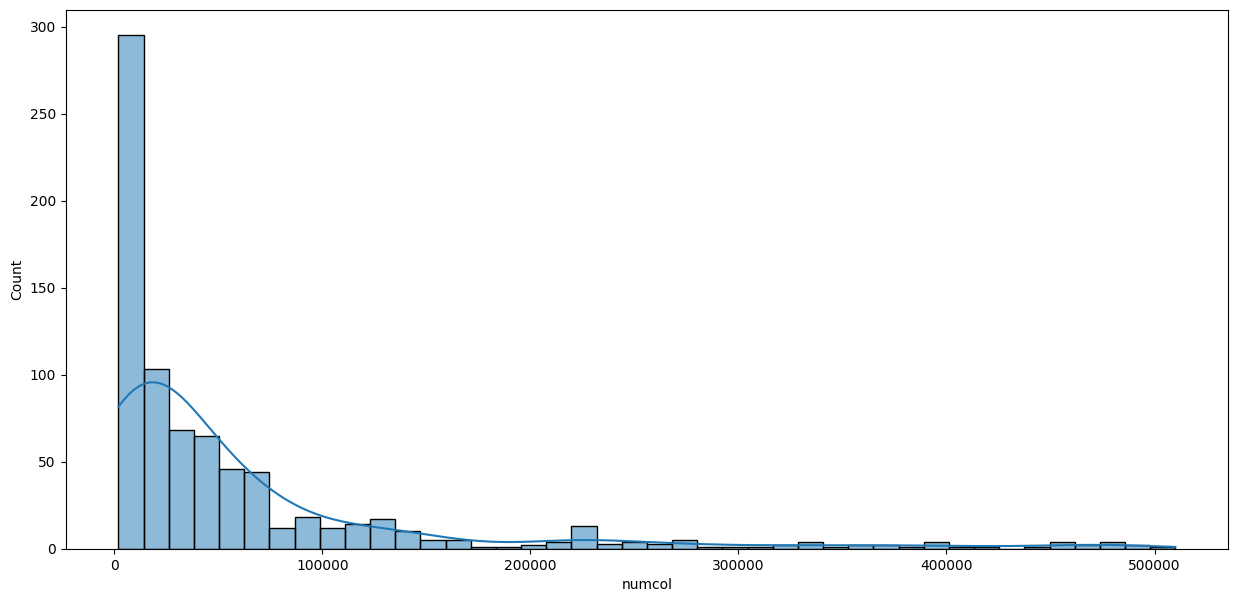

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data= honeyprod, x= "numcol", kde= True);


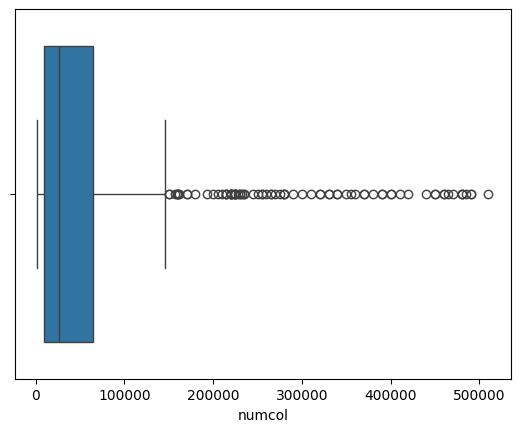

In [ ]:
sns.boxplot(data = honeyprod, x = 'numcol');


Observations:
- *Most of the data is concentrated within the range of 0-50000, which means most of the states have around 50000 which are producing honey*
- *The distribution is right-skewed with a lot of outliers towards the higher end*
- *The median honey-producing colonies is nearly 25000*

## Let's look at the spread of yield per colony

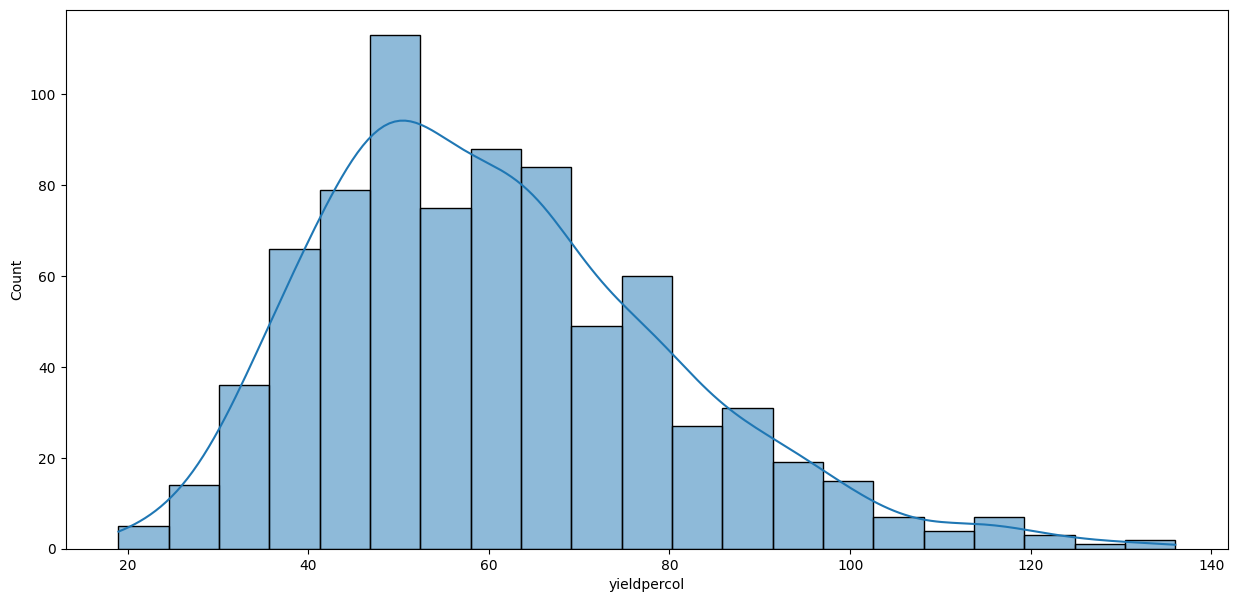

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data= honeyprod, x= "yieldpercol", kde= True);


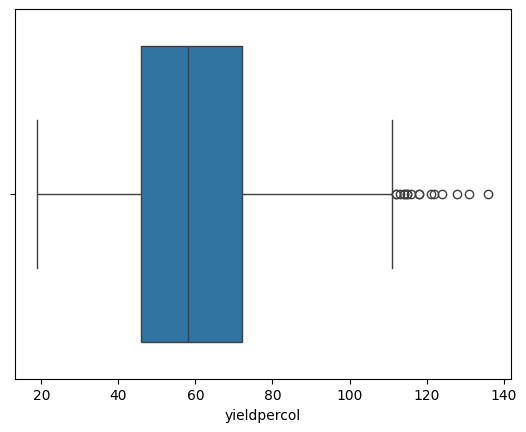

In [ ]:
sns.boxplot(data = honeyprod, x = 'yieldpercol');


- *Distribution looks like almost evenly distributed with little skewness*
- *Yield per colony of honey has a right skewed distribution with a lot of outliers towards the higher end*
- *The median yield per colony is close to 60 pounds*

## Let us look at the distribution of total production of honey

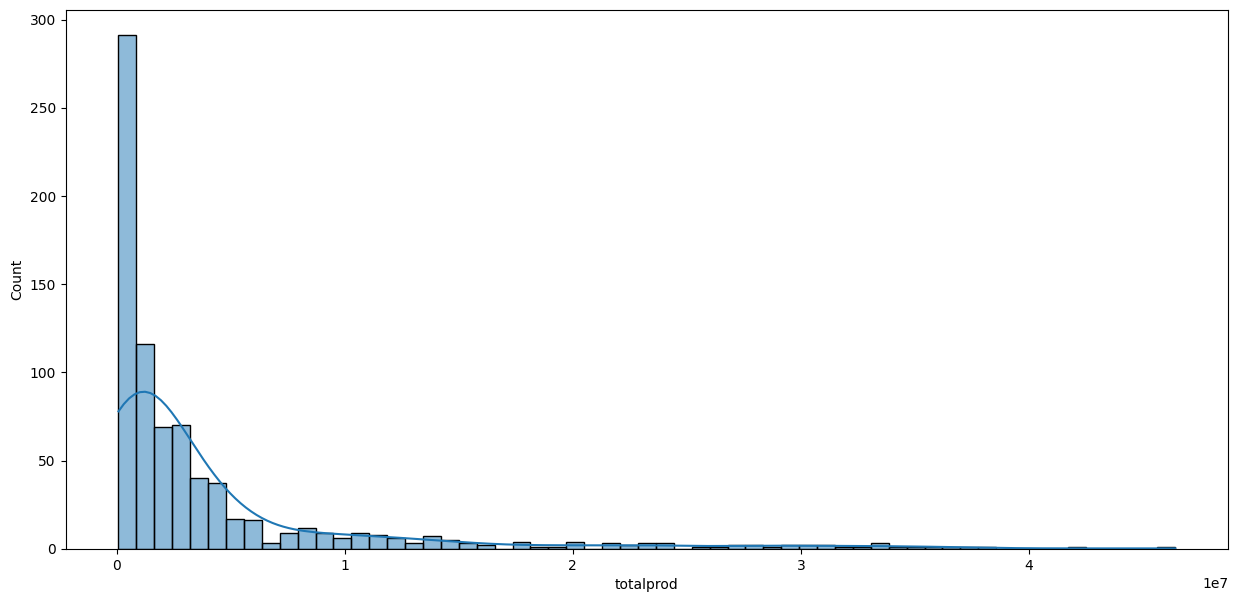

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data= honeyprod, x= "totalprod", kde= True);


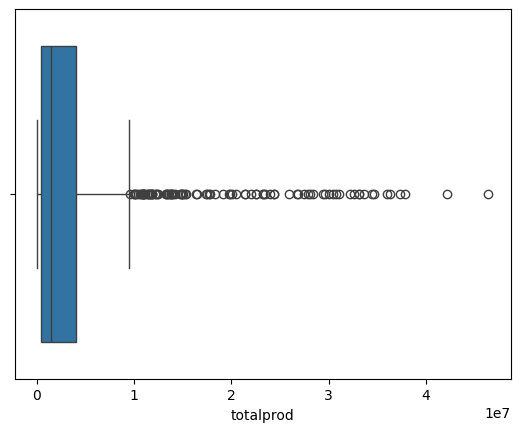

In [ ]:
sns.boxplot(data = honeyprod, x = 'totalprod');


- *Total production has a right-skewed distribution with a lot of outliers towards the higher end*
- *The median of total production is nearly 0.1 pounds*
- *Since total production is related to the number of colonies, the distribution is almost similar to that variable*

## Let's look at the distribution of cost of honey per pound

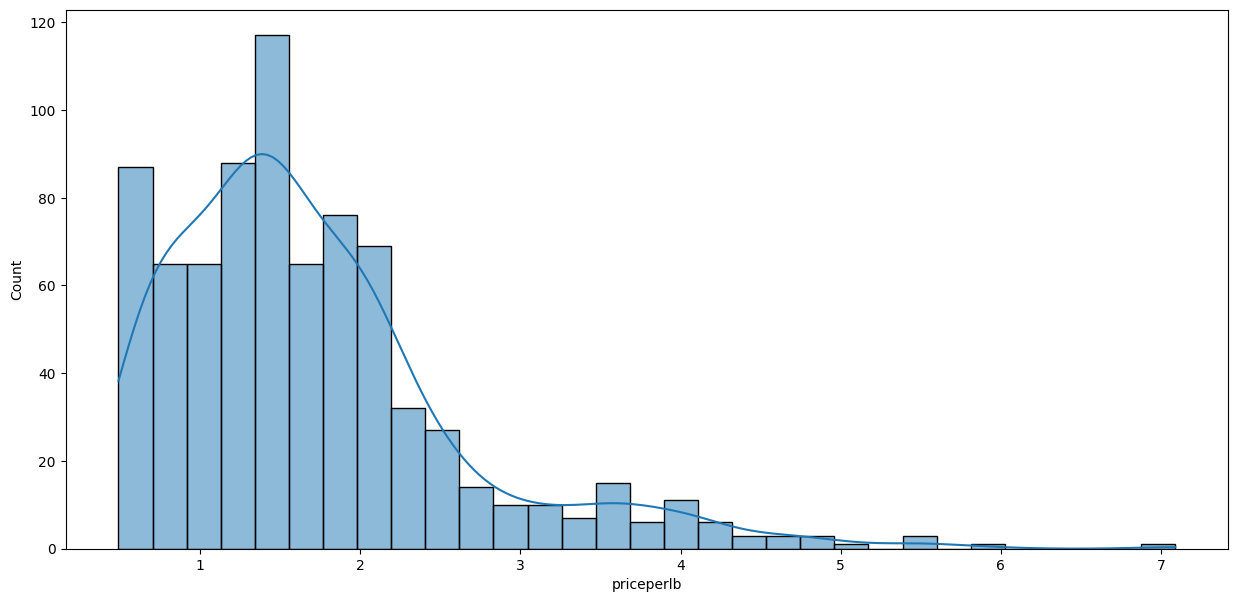

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data= honeyprod, x= "priceperlb", kde= True);


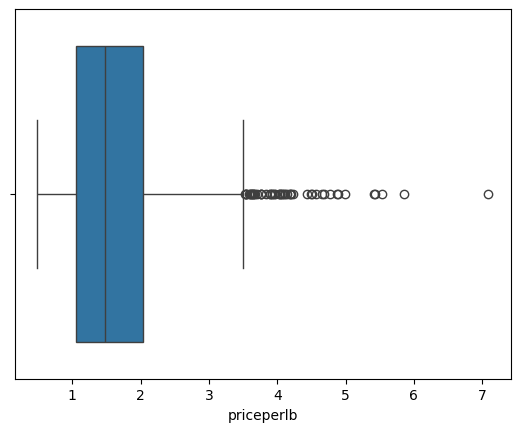

In [ ]:
sns.boxplot(data = honeyprod, x = 'priceperlb');


- *Most of the honey is priced between 0-2 dollars*
- *Price per pound of honey has a right-skewed distribution with a lot of outliers towards the higher end*
- *The median price per pound of honey is 1.5 dollars*

##Let's look at the distribution of value of production.

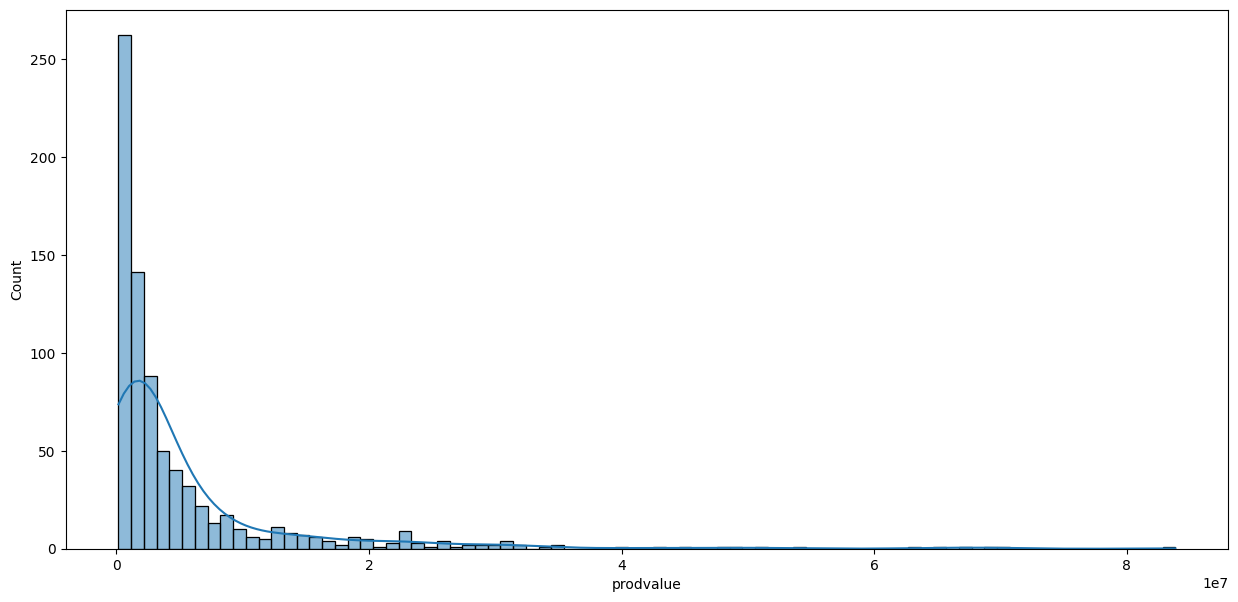

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data= honeyprod, x= "prodvalue", kde= True);

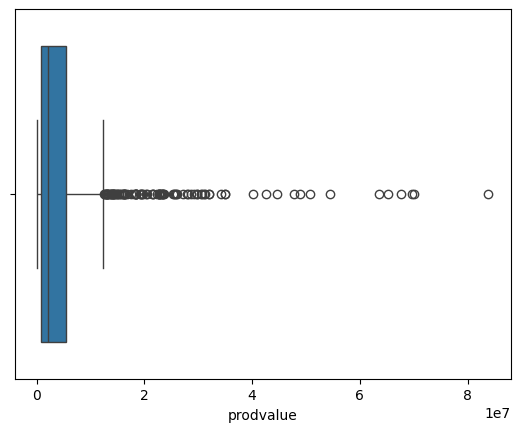

In [ ]:
sns.boxplot(data = honeyprod, x = 'prodvalue');


- *Production value has a right-skewed distribution with a lot of outliers towards the higher end*
- *The median production value is 0 and 1 dollars*

## Let us look at the distribution of stocks held by producers.

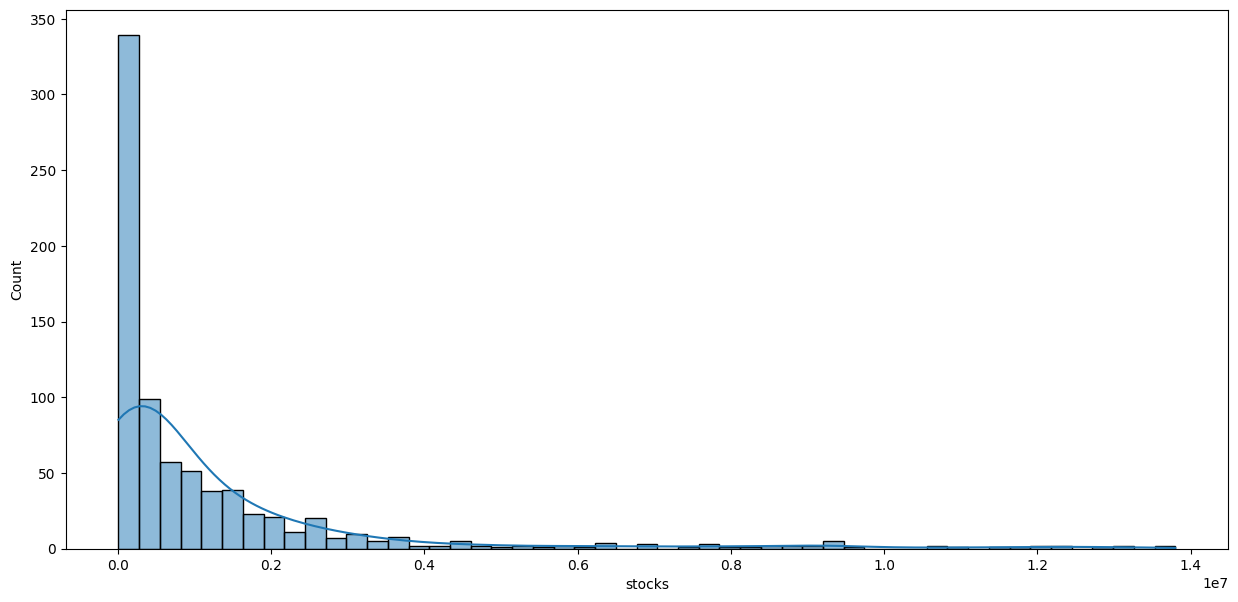

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data= honeyprod, x= "stocks", kde= True);


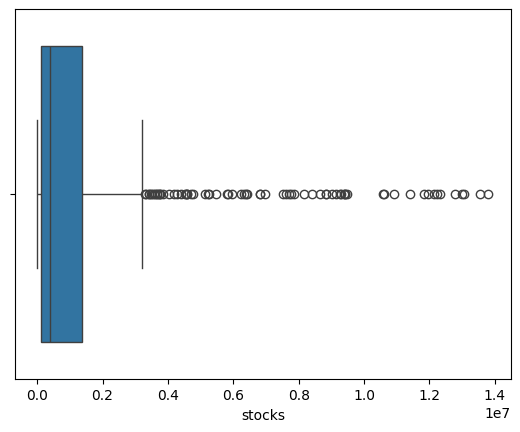

In [ ]:
sns.boxplot(data = honeyprod, x = 'stocks');


- *Stocks held by producers has a right-skewed distribution with a lot of outliers towards the higher end*
- *The median stocks held by producers is close to 0, which shows the majority of the producers hold very less stocks to themselves*

## Let's try to visualise how these numerical variables are associated with each other

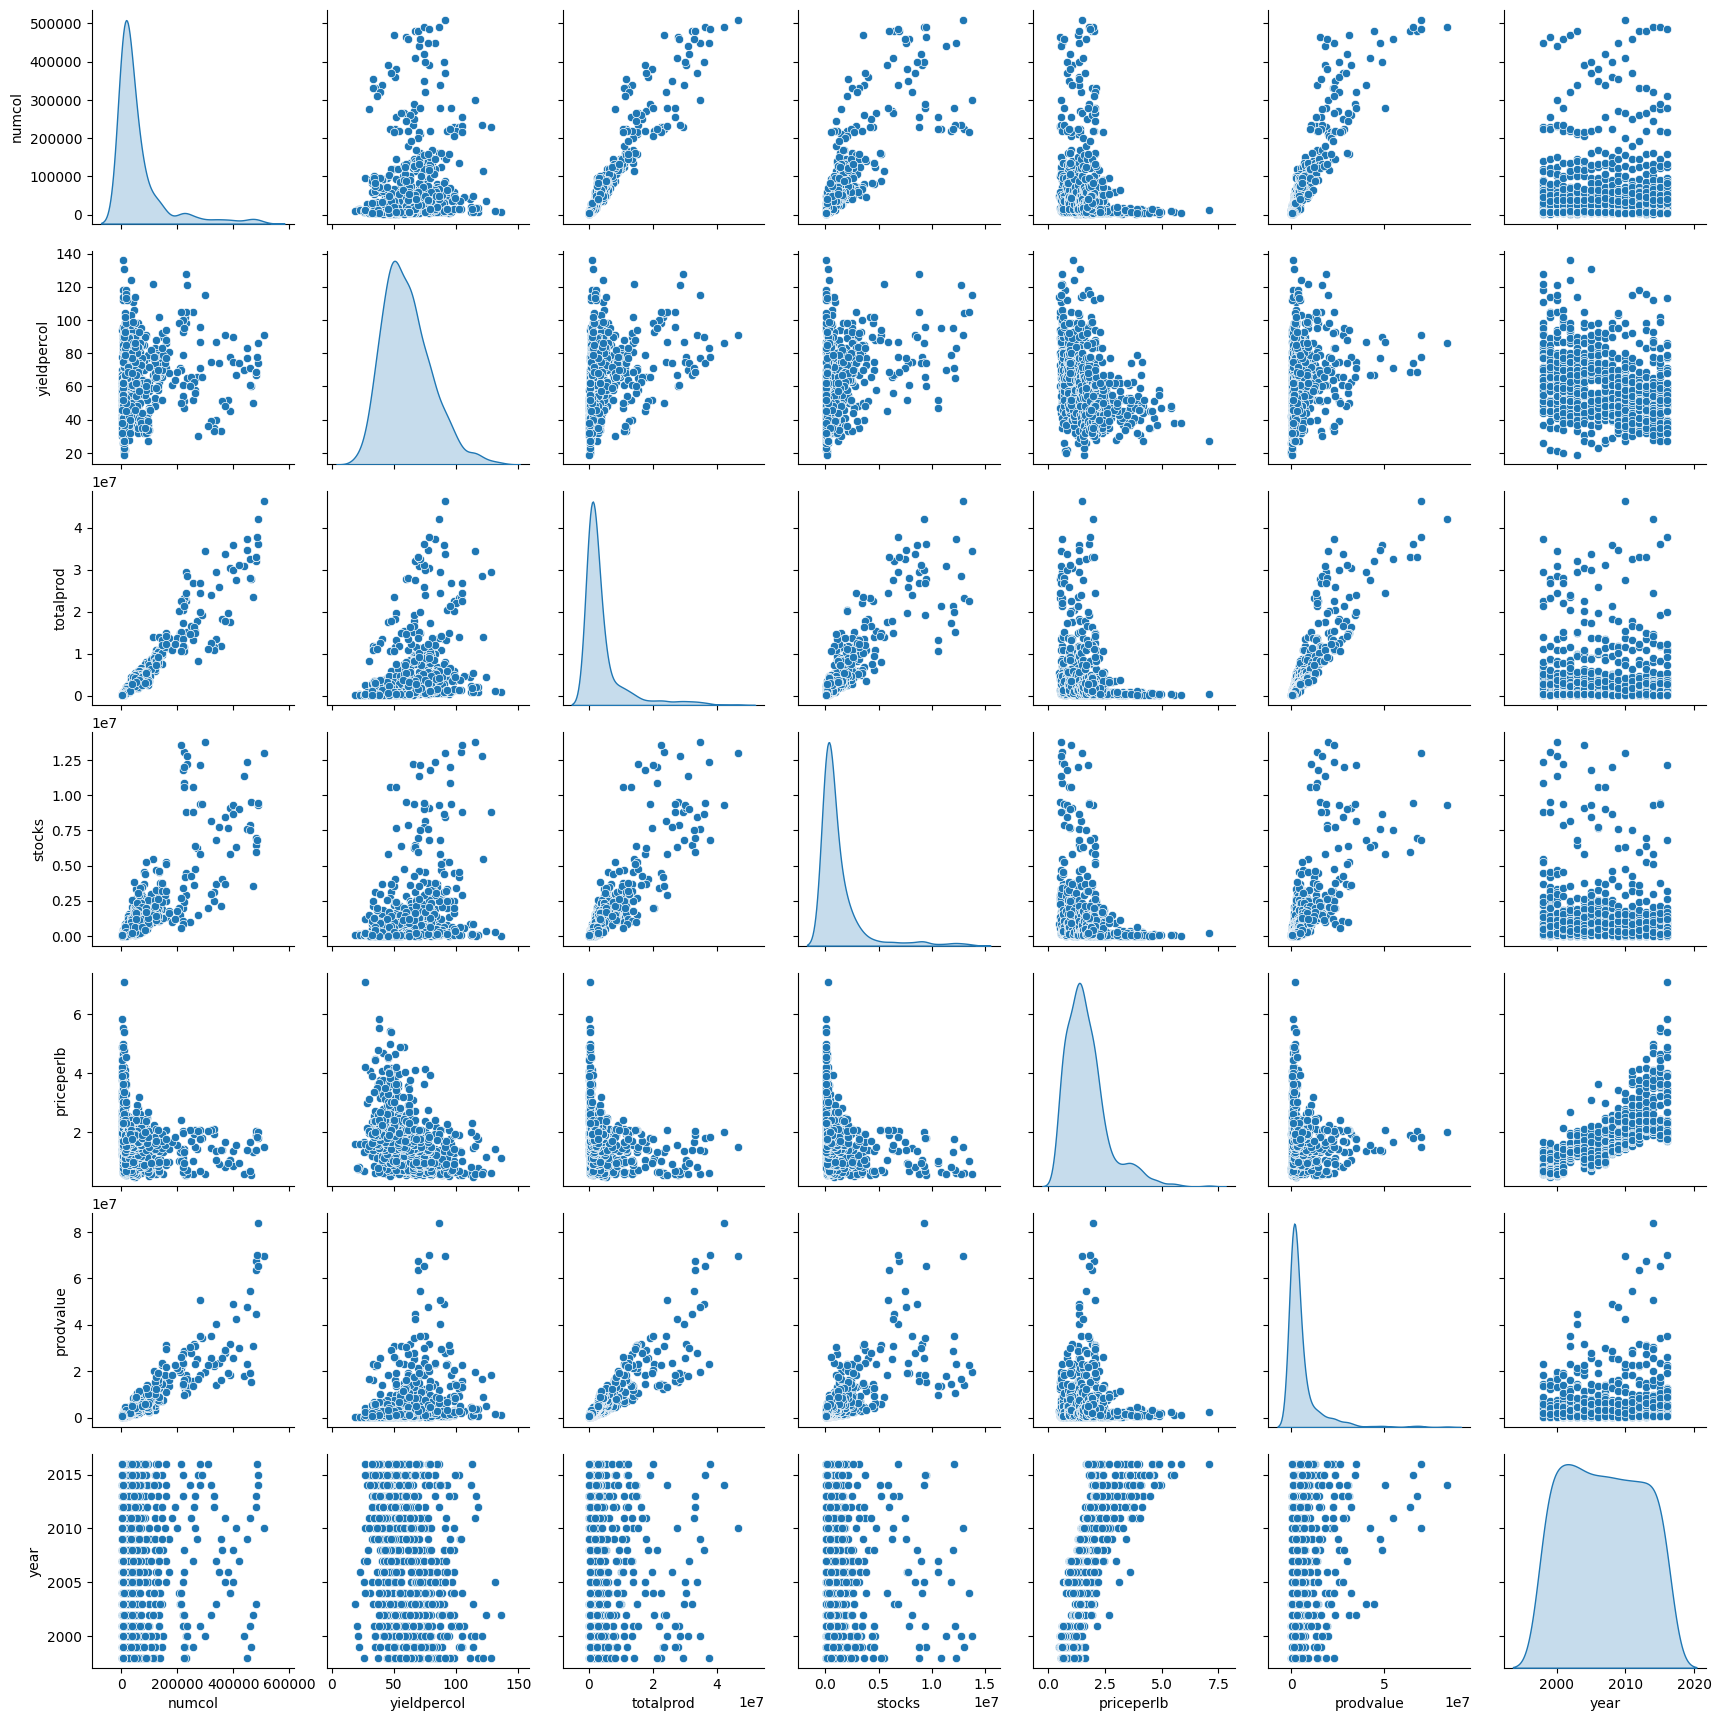

In [ ]:
sns.pairplot(honeyprod, diag_kind="kde");

In [ ]:
# Removing the 'state' and 'year' columns
honeyprod_without_state = honeyprod.drop(columns=['state','year'])

# Calculate the correlation
correlation = honeyprod_without_state.corr() # creating a 2-D Matrix with correlation plots
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.00,0.22,0.95,0.82,-0.21,0.90
yieldpercol,0.22,1.00,0.38,0.36,-0.36,0.26
totalprod,0.95,0.38,1.00,0.88,-0.24,0.90
stocks,0.82,0.36,0.88,1.00,-0.28,0.71
priceperlb,-0.21,-0.36,-0.24,-0.28,1.00,-0.06
prodvalue,0.90,0.26,0.90,0.71,-0.06,1.00


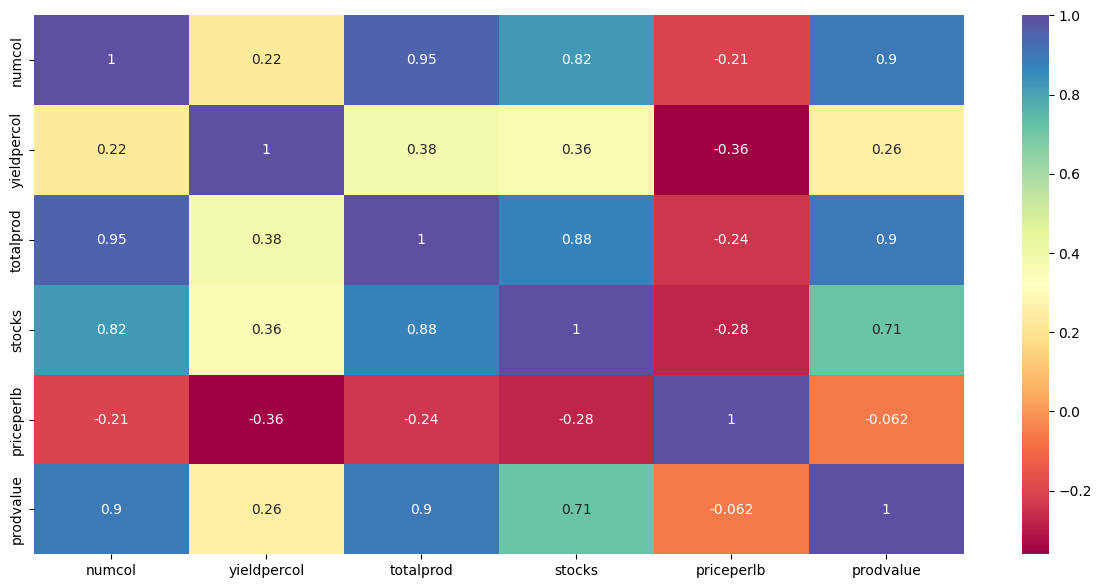

In [ ]:

plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, cmap="Spectral");


- *Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other*
- *Yield per colony does not have a high correlation with any of the features that we have in our dataset*
- *Same is the case with priceperlb*
- *Determining the factors influencing per colony yield and price per pound of honey would need further investigation*  

Similarly, we can explore the other two variables as well i.e. `state` and `year` columns

## Let's try to visualise trends in columns `state` and `year`

Let's check which states are producing honey

In [ ]:
honeyprod['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

In [ ]:
honeyprod['state'].nunique()

44

So, in total, 44 states are producing honey

### Let's extract which states have maximum and minimum honey production

In [ ]:
top10_totalprod= honeyprod.groupby('state').sum()[['totalprod']].sort_values('totalprod', ascending=False).reset_index().head(10) #top 10 states producing maximum honey
top10_totalprod

,state,totalprod
0,North Dakota,624435000.00
1,California,390315000.00
2,South Dakota,344361000.00
3,Florida,297798000.00
4,Montana,210125000.00
5,Minnesota,175432000.00
6,Texas,137832000.00
7,Wisconsin,95067000.00
8,Michigan,93788000.00
9,Idaho,78362000.00


<Figure size 2000x600 with 0 Axes>

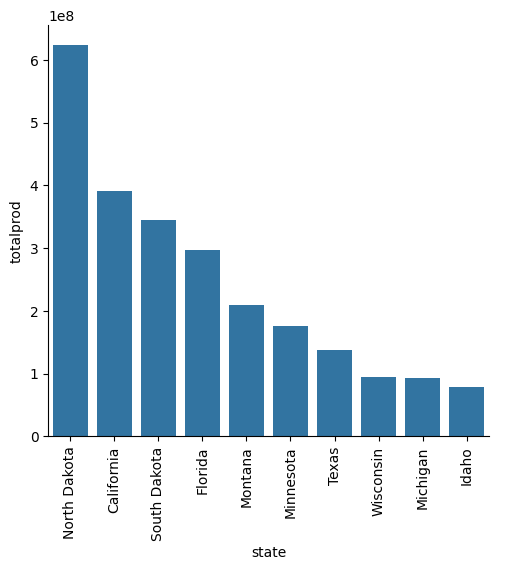

In [ ]:
plt.figure(figsize=(20,6))
sns.catplot(data=top10_totalprod,x= 'state', y='totalprod', kind='bar')
plt.xticks(rotation=90);

In [ ]:
bottom10_totalprod= honeyprod.groupby('state').sum()[['totalprod']].sort_values('totalprod', ascending=False).reset_index().tail(10) #top 10 states producing minimum honey
bottom10_totalprod

,state,totalprod
34,New Mexico,7147000.00
35,Vermont,6720000.00
36,West Virginia,5615000.00
37,Maine,5256000.00
38,Virginia,4837000.00
39,Nevada,4832000.00
40,Kentucky,4263000.00
41,South Carolina,3174000.00
42,Maryland,1266000.00
43,Oklahoma,1207000.00


<Figure size 2000x600 with 0 Axes>

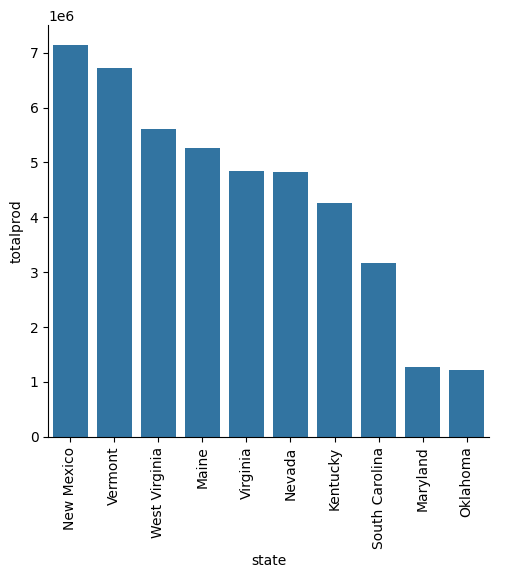

In [ ]:
plt.figure(figsize=(20,6))
sns.catplot(data=bottom10_totalprod,x= 'state', y='totalprod', kind='bar');
plt.xticks(rotation=90);

- *North Dakota is producing the maximum amount of honey followed by California and South Dakota as compared to other states*
- *Oklahoma is producing the least amount of honey in total followed by Maryland and South California*

### Similarly we can check the which state is producing costliest and cheapest honey

In [ ]:
top10_price= honeyprod.groupby('state').sum()[['priceperlb']].sort_values('priceperlb', ascending=False).reset_index().head(10) #top 10 states producing maximum honey
top10_price

,state,priceperlb
0,Virginia,55.36
1,Illinois,50.47
2,North Carolina,47.56
3,Kentucky,46.51
4,Tennessee,44.64
5,West Virginia,43.61
6,New Jersey,41.25
7,Vermont,40.43
8,Maine,38.42
9,Ohio,38.26


<Figure size 2000x600 with 0 Axes>

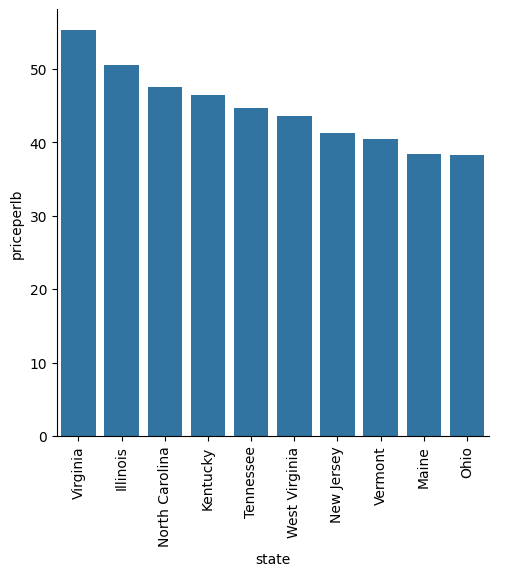

In [ ]:
plt.figure(figsize=(20,6))
sns.catplot(data=top10_price,x= 'state', y='priceperlb', kind='bar')
plt.xticks(rotation=90);

In [ ]:
bottom10_price= honeyprod.groupby('state').sum()[['priceperlb']].sort_values('priceperlb', ascending=False).reset_index().tail(10) #top 10 states producing minimum honey
bottom10_price

,state,priceperlb
34,South Dakota,24.80
35,North Dakota,24.56
36,Nevada,24.41
37,Arkansas,24.35
38,Mississippi,23.88
39,Louisiana,23.77
40,New Mexico,19.77
41,South Carolina,16.57
42,Maryland,9.37
43,Oklahoma,8.74


<Figure size 2000x600 with 0 Axes>

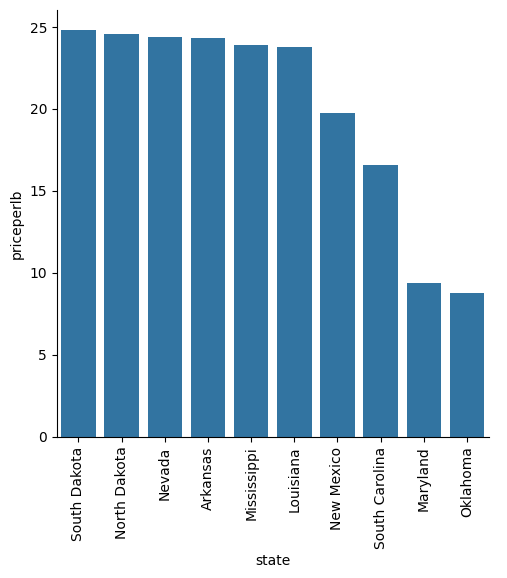

In [ ]:
plt.figure(figsize=(20,6))
sns.catplot(data=bottom10_price,x= 'state', y='priceperlb', kind='bar')
plt.xticks(rotation=90);

- *Virginia is producing the costliest honey followed by Illinois and North Carolina as compared to other states*
- *Averagely Oklahoma is producing the cheapest honey followed by Maryland and South Carolina*

Since we have explored various attributes present in the dataset, now let's try to answer the questions to check the trend across the years

## Let's look at the overall trend of honey production in the US over the years

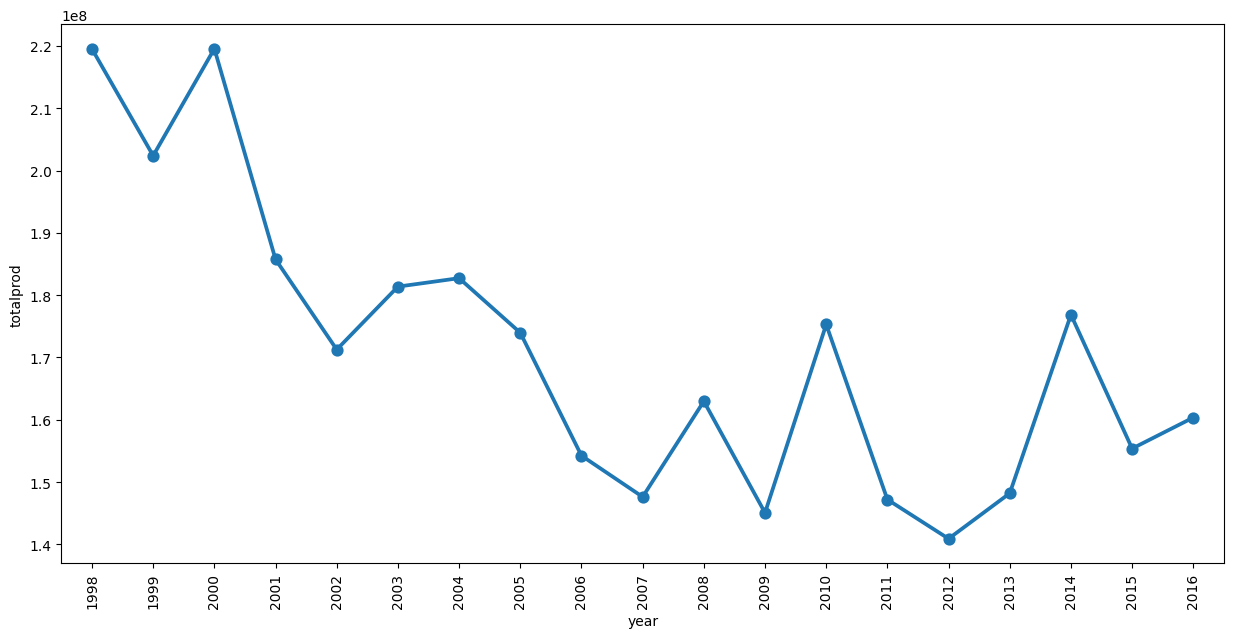

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, errorbar=None)
plt.xticks(rotation=90);


- *The overall honey production in the US has been decreasing over the years*
- *Total honey production = number of colonies * average yield per colony. Let's check if the honey production is decreasing due to one of these factors or both*

## Variation in the number of colonies over the years

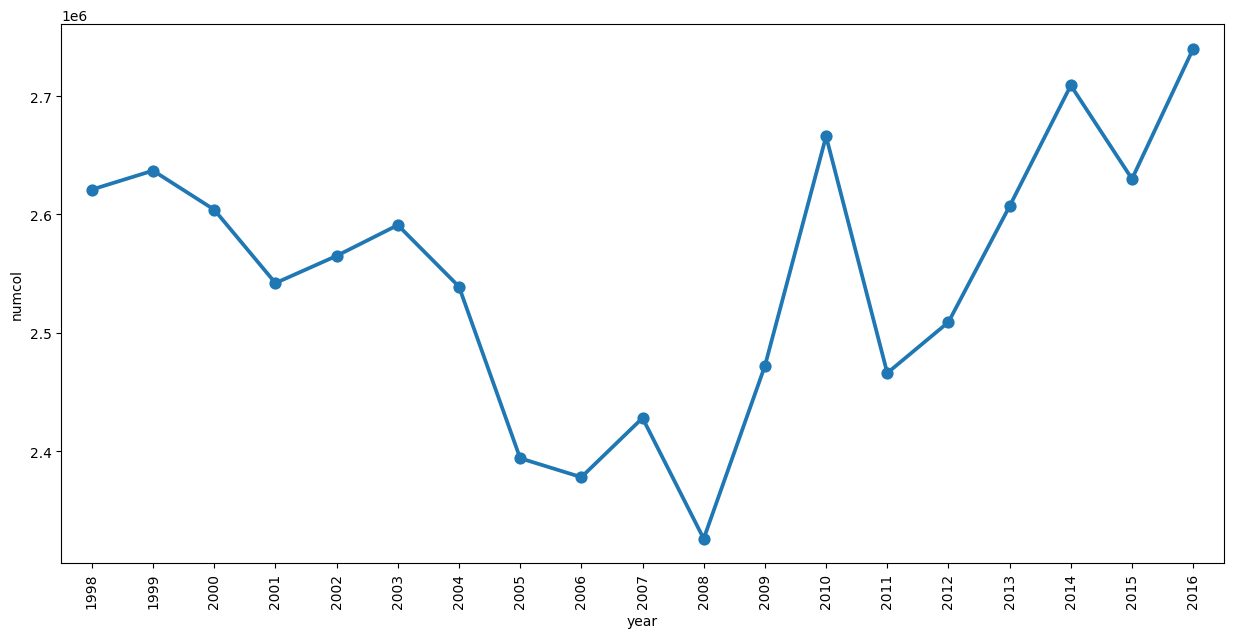

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='numcol', data=honeyprod, errorbar=None, estimator=sum)
plt.xticks(rotation=90);

- *The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick after 2008*
- *It is possible that there was some intervention in 2008 that help in increasing the number of honey bee colonies across the country*

## Variation of yield per colony over the years

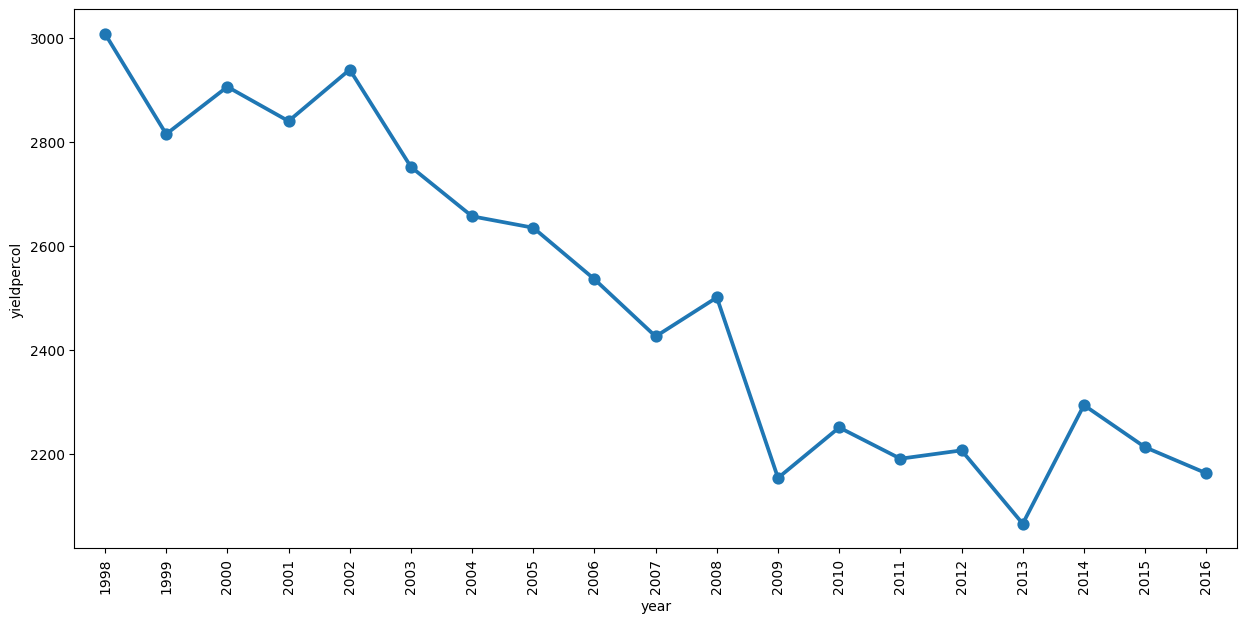

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='yieldpercol', data=honeyprod, estimator=sum, errorbar=None)
plt.xticks(rotation=90);

- *In contrast to the number of colonies, the yield per colony has been decreasing since 1998*
- *This indicates that it is not the number of colonies that is causing a decline in total honey production but the yield per colony*

## Let' s look at the production trend at state level

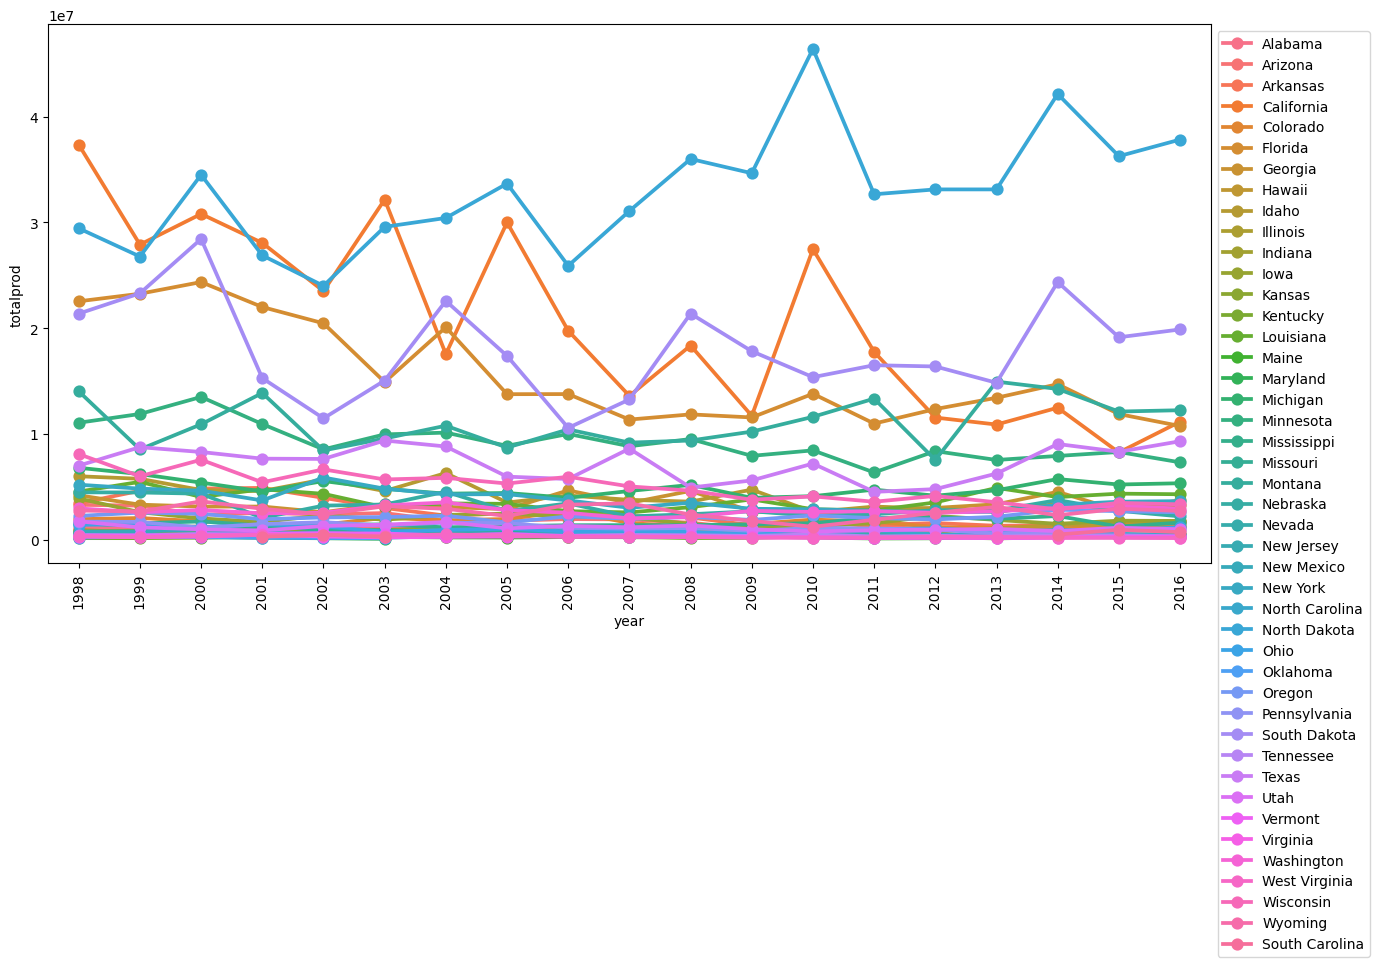

In [ ]:
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize=(15, 7)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, errorbar=None, hue = 'state')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90);

- *some states have much higher productions than the others but this plot is a little hard to read*
- *Let's try plotting each state separately for a better understanding*

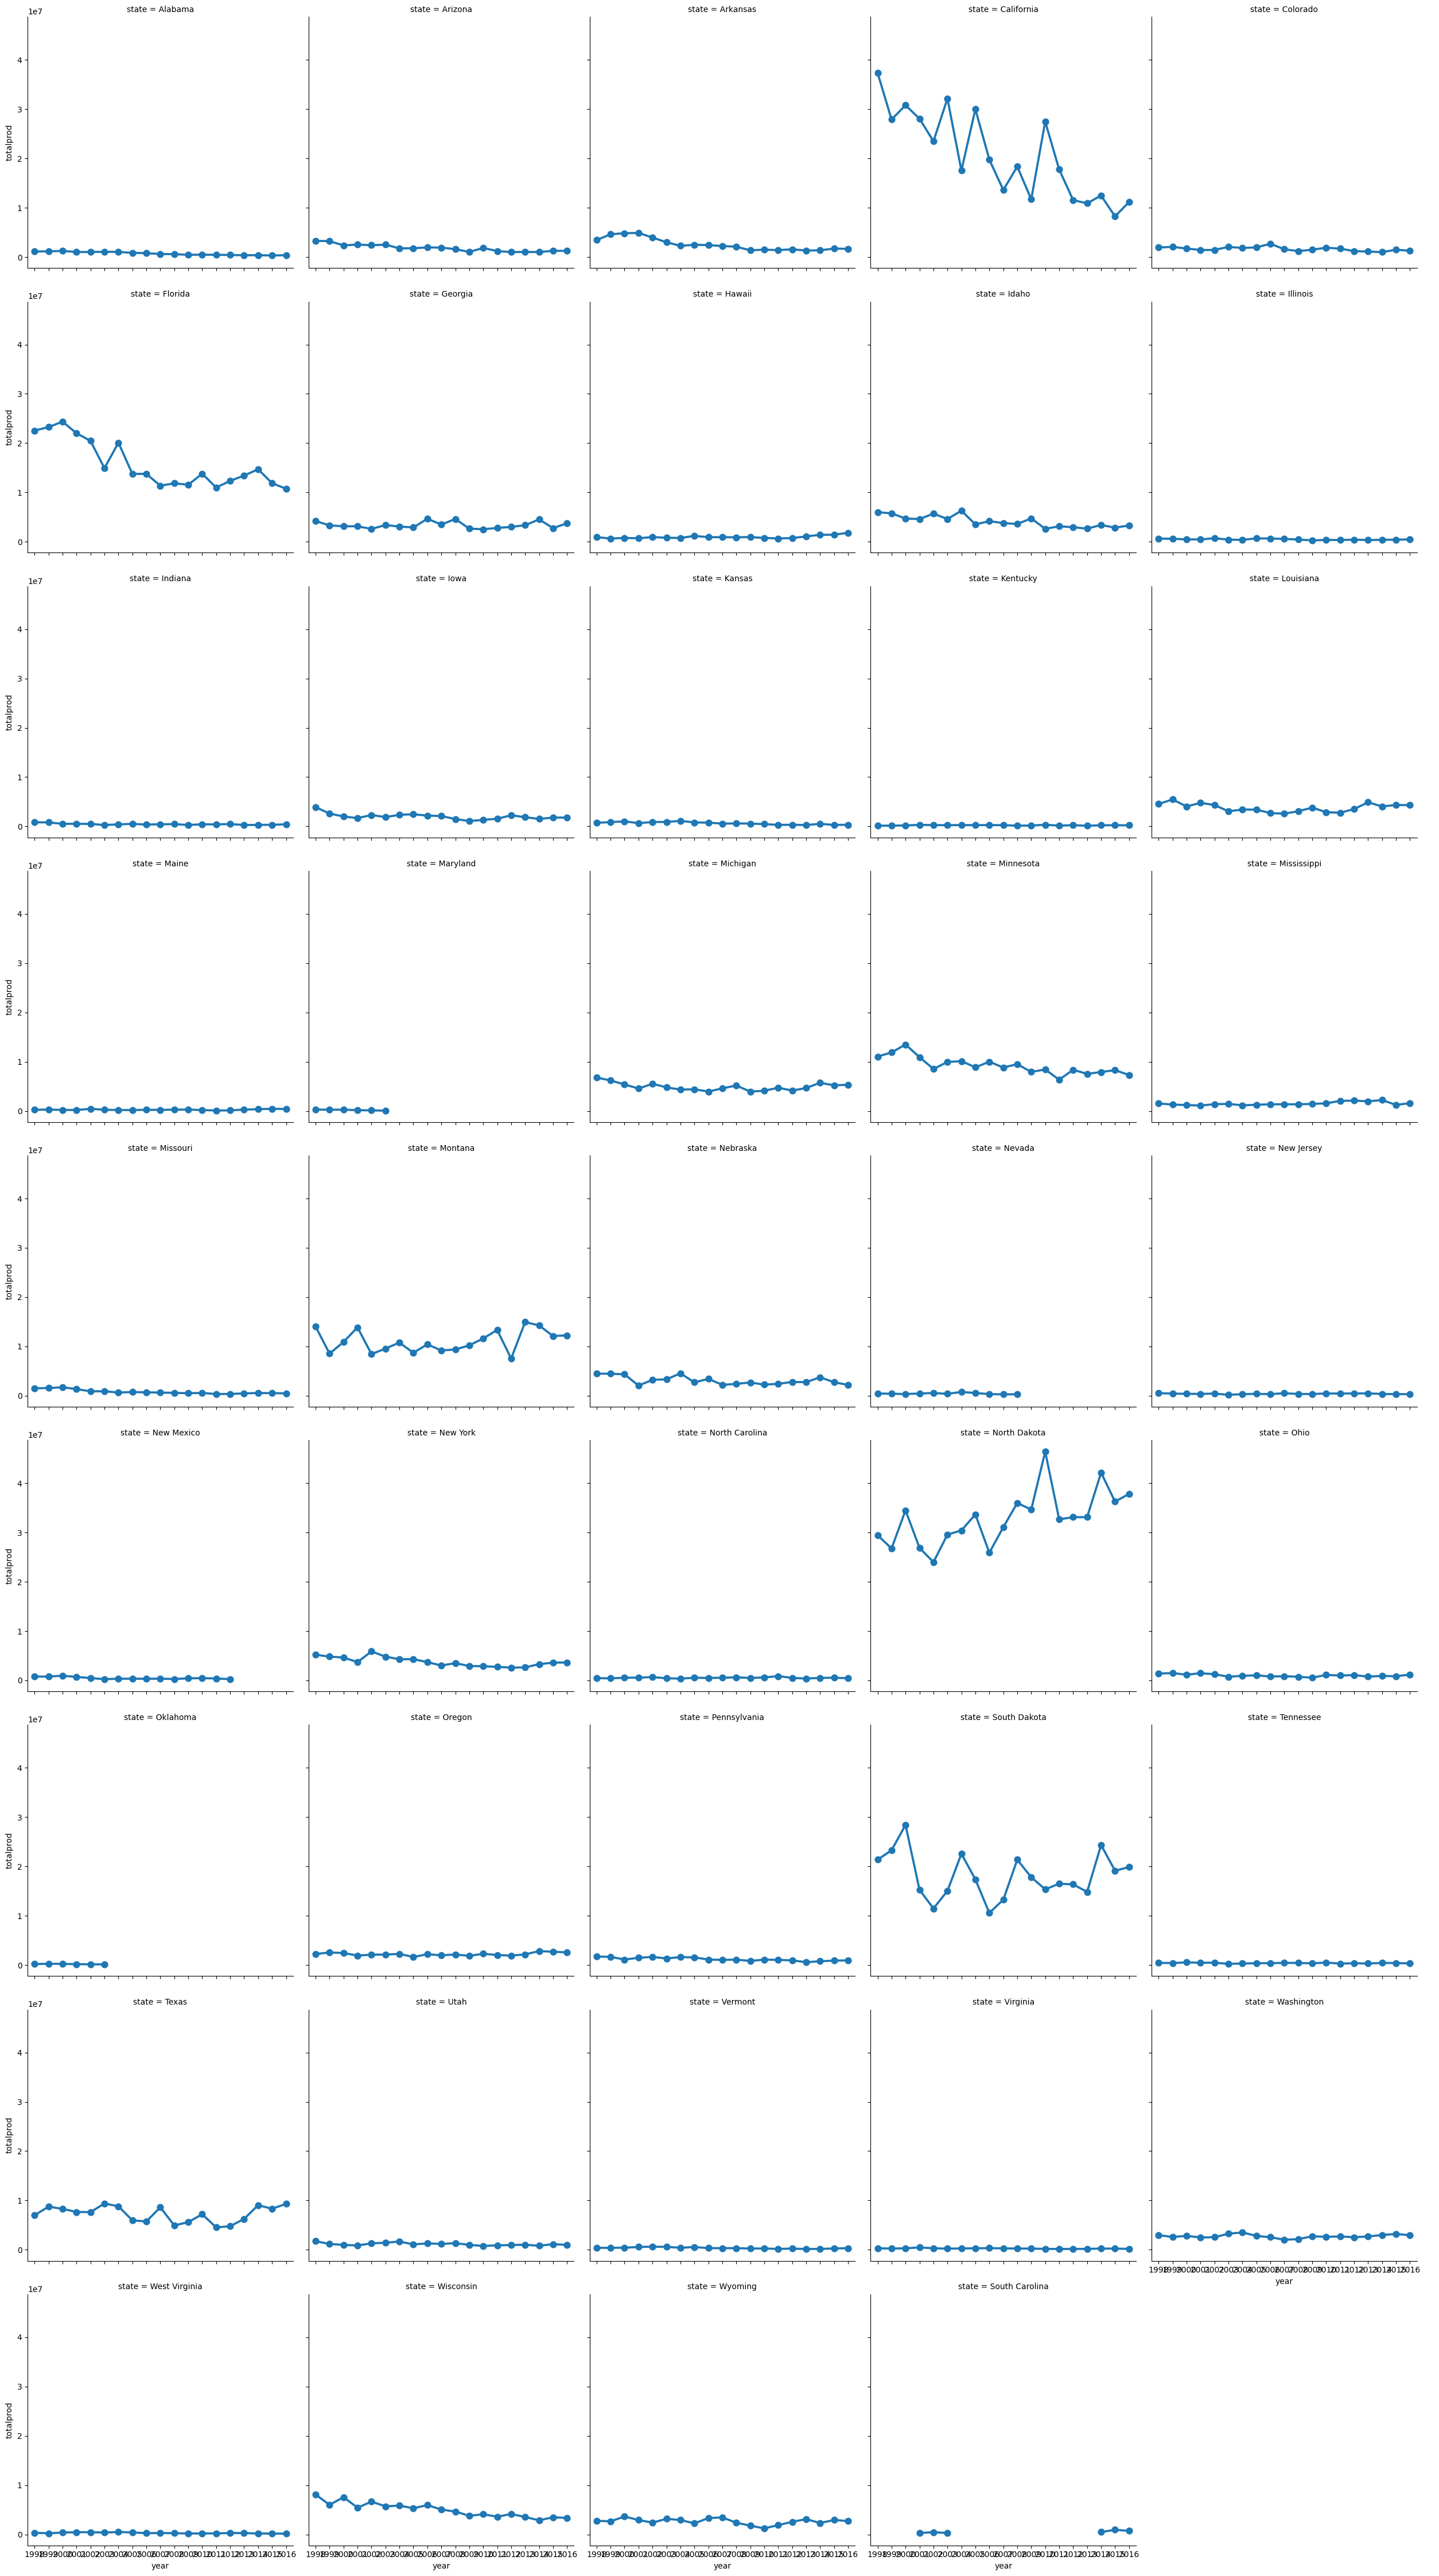

In [ ]:
sns.catplot(x='year', y='totalprod', data=honeyprod,
                estimator=sum, col='state', kind="point",
              col_wrap = 5);

- *The most prominent honey producing states of US are - California, Florida, North Dakota and South Dakota and Montana*
- *Unfortunately, the honey production in California has seen a steep decline over the years*
- *Florida's total production also has been on a decline*
- *South Dakota has more of less maintained its levels of production*
- *North Dakota has actually seen an impressive increase in the honey production*

## Let's look at the yearly trend in number of colonies and yield per colony in the 5 prominent states

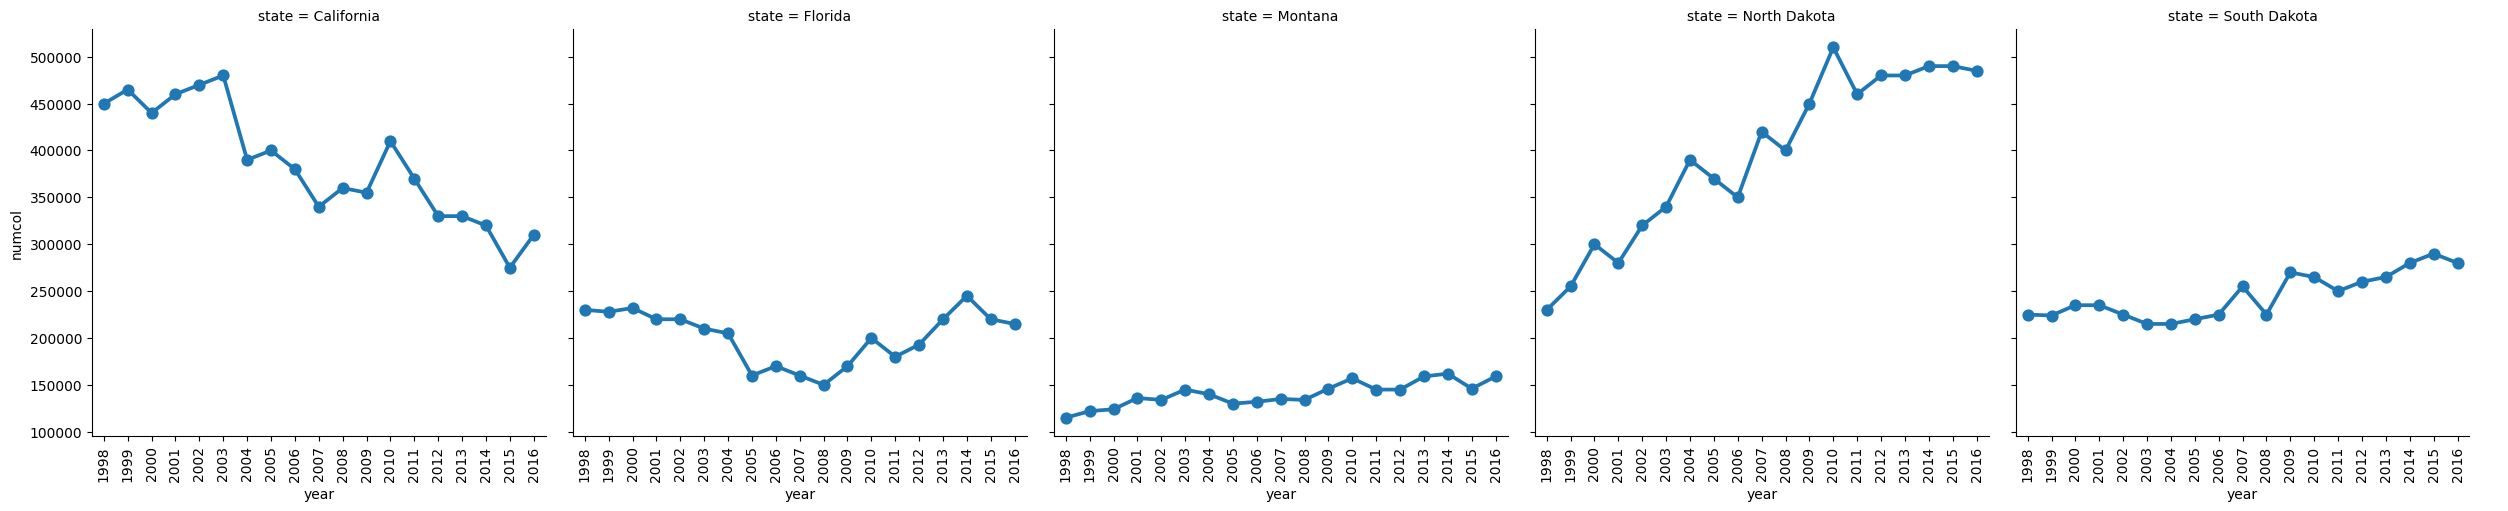

In [ ]:
cplot1=sns.catplot(x='year', y='numcol',
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                col_wrap = 5)
cplot1.set_xticklabels(rotation=90);

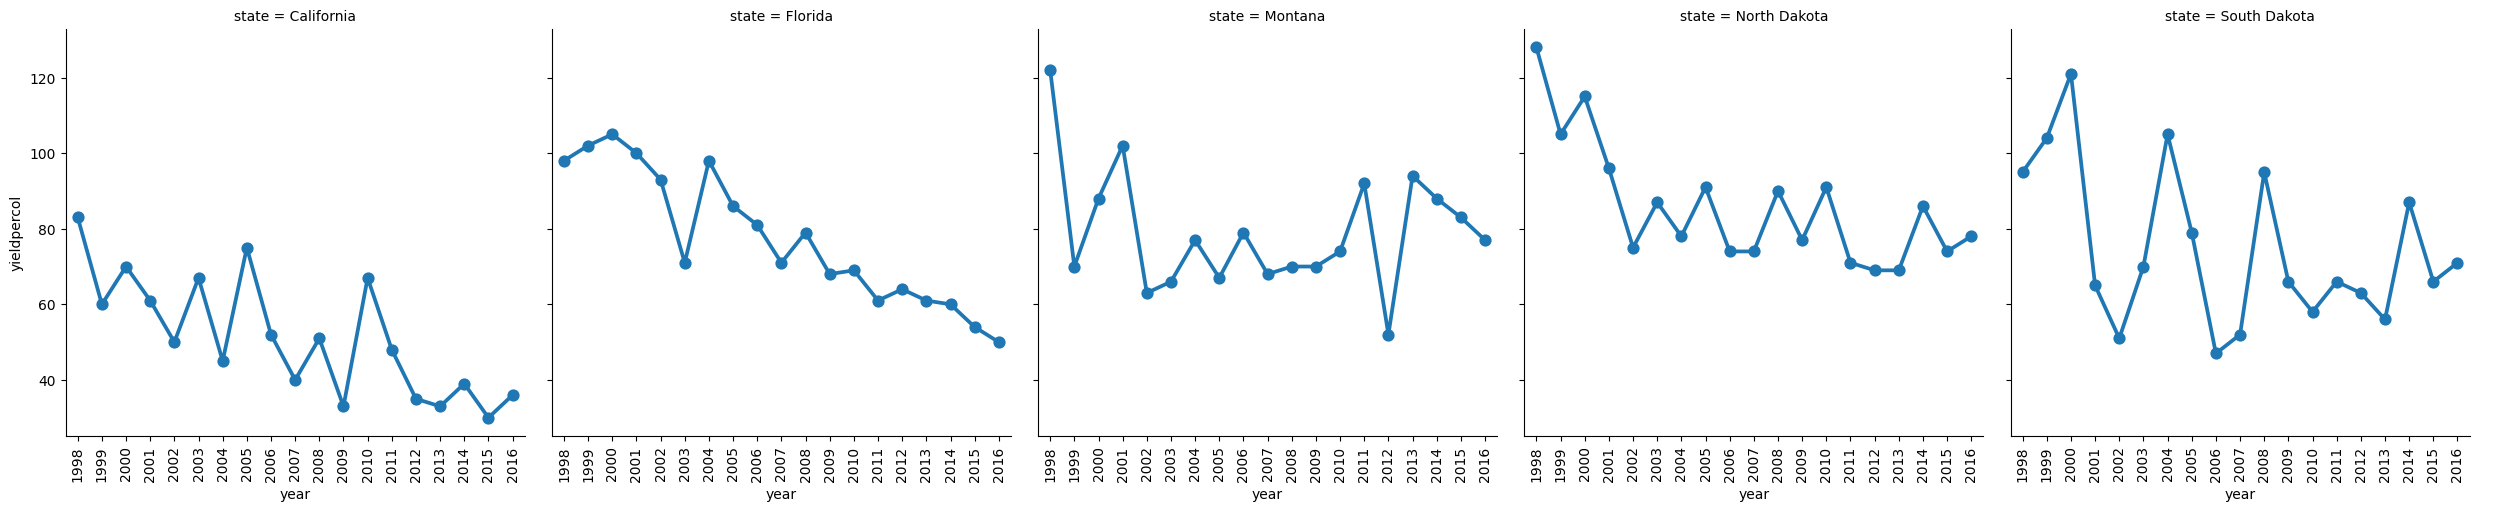

In [ ]:
cplot2=sns.catplot(x='year', y='yieldpercol',
            data=honeyprod[honeyprod["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                col_wrap = 5)
cplot2.set_xticklabels(rotation=90);

- *In North Dakota, the number of colonies has increased significantly over the years as compared to the other 4 states*
- *If we check the yield per colony, it has been in an overall decreasing trend for all the 5 states over the years*

## Let us see what effect, the declining production trend has on the value of production

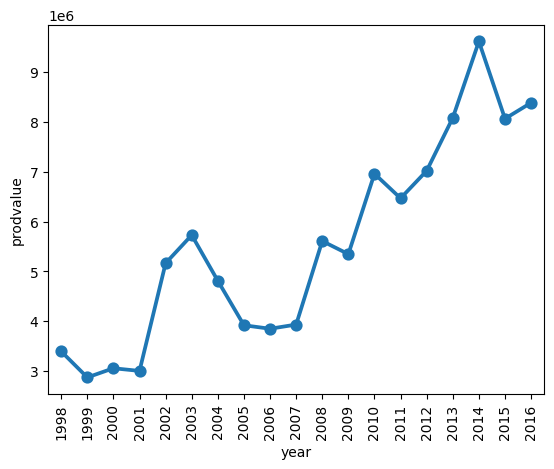

In [ ]:
sns.pointplot(x="year", y="prodvalue", data=honeyprod, errorbar=None)
plt.xticks(rotation=90);

- *This is an interesting trend. As the total production has declined over the years, the value of production per pound has increased over time*
- *As the supply declined, the demand has added to the value of honey*

## Let's check which of the states have been capitalising on this trend. We can compare the total production with the stocks held by the producers.

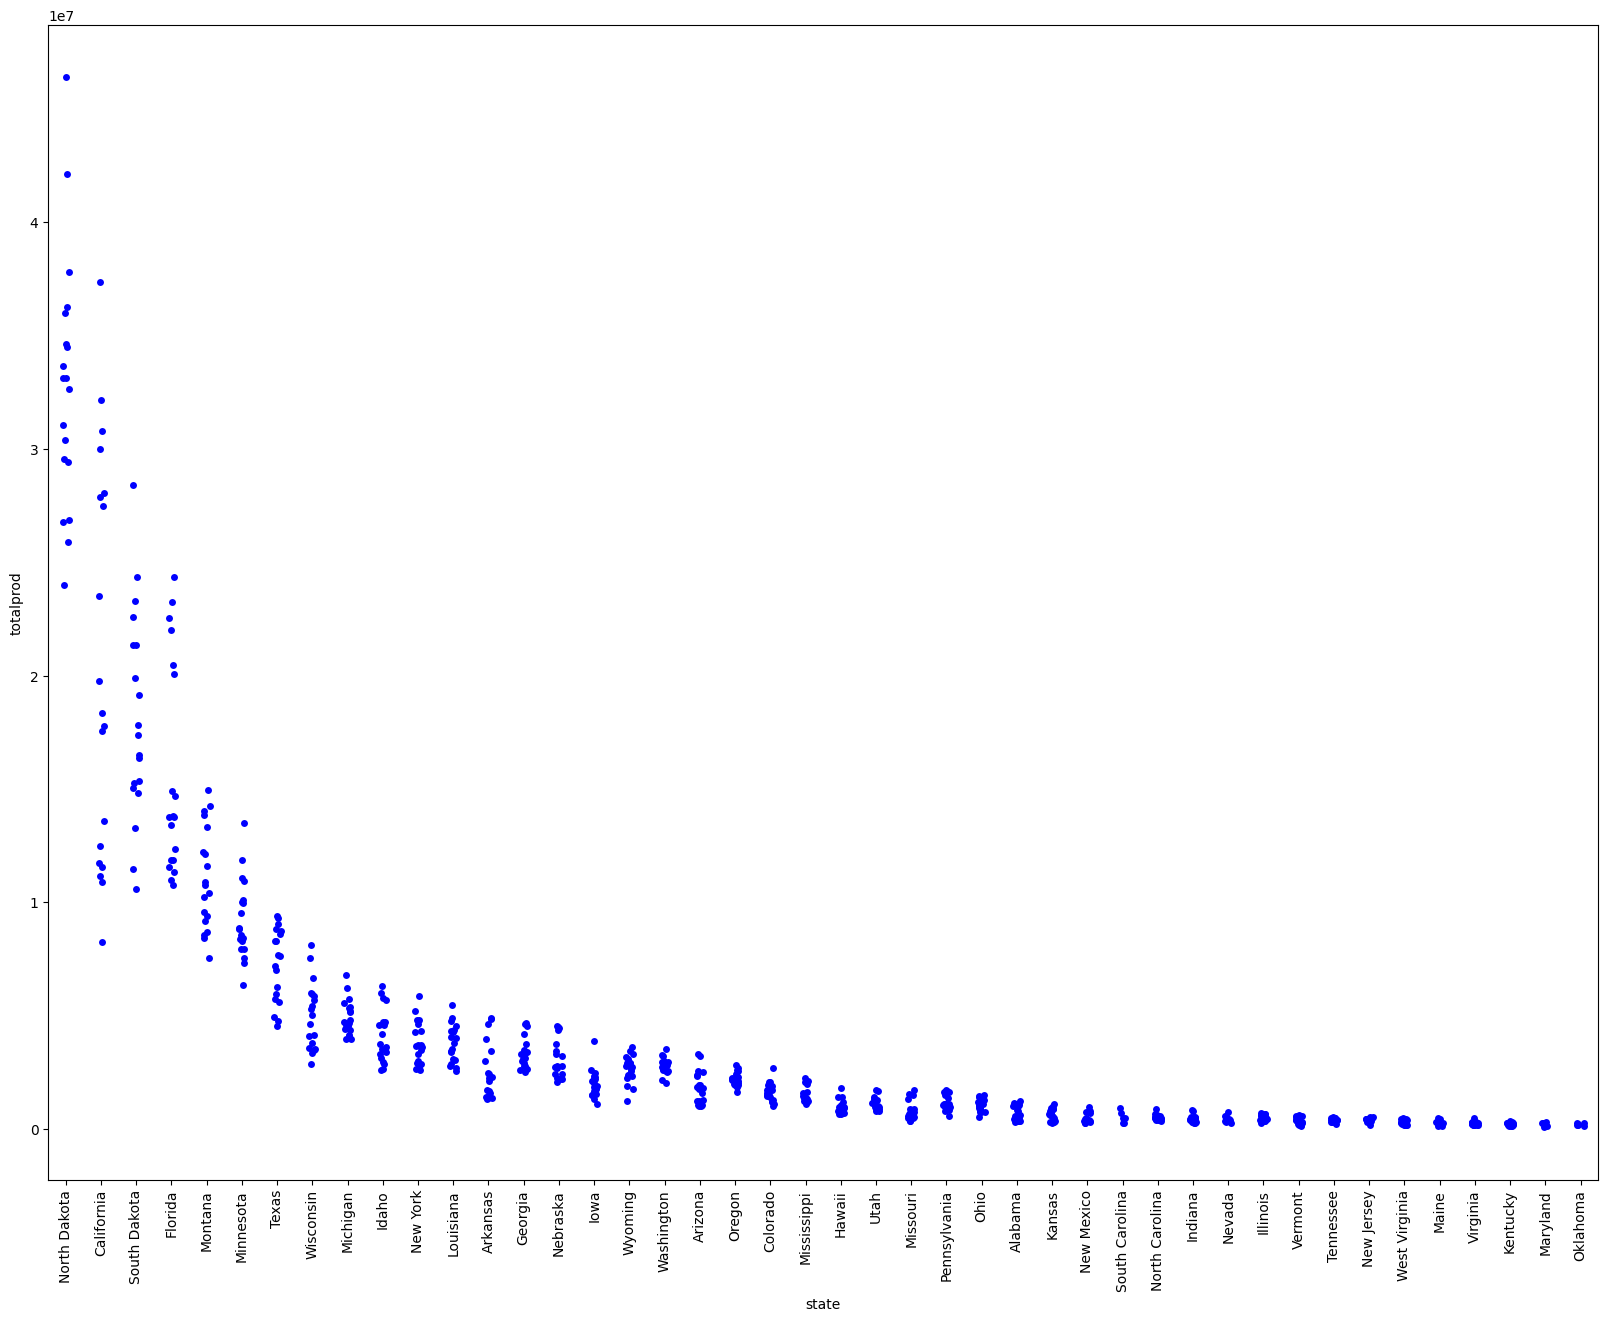

In [ ]:
plt.figure(figsize = (20,15)) # To resize the plot

# Plot total production per state
sns.stripplot(x="state", y="totalprod", data=honeyprod.sort_values("totalprod", ascending=False),
              color="b", jitter=True)
plt.xticks(rotation=90);

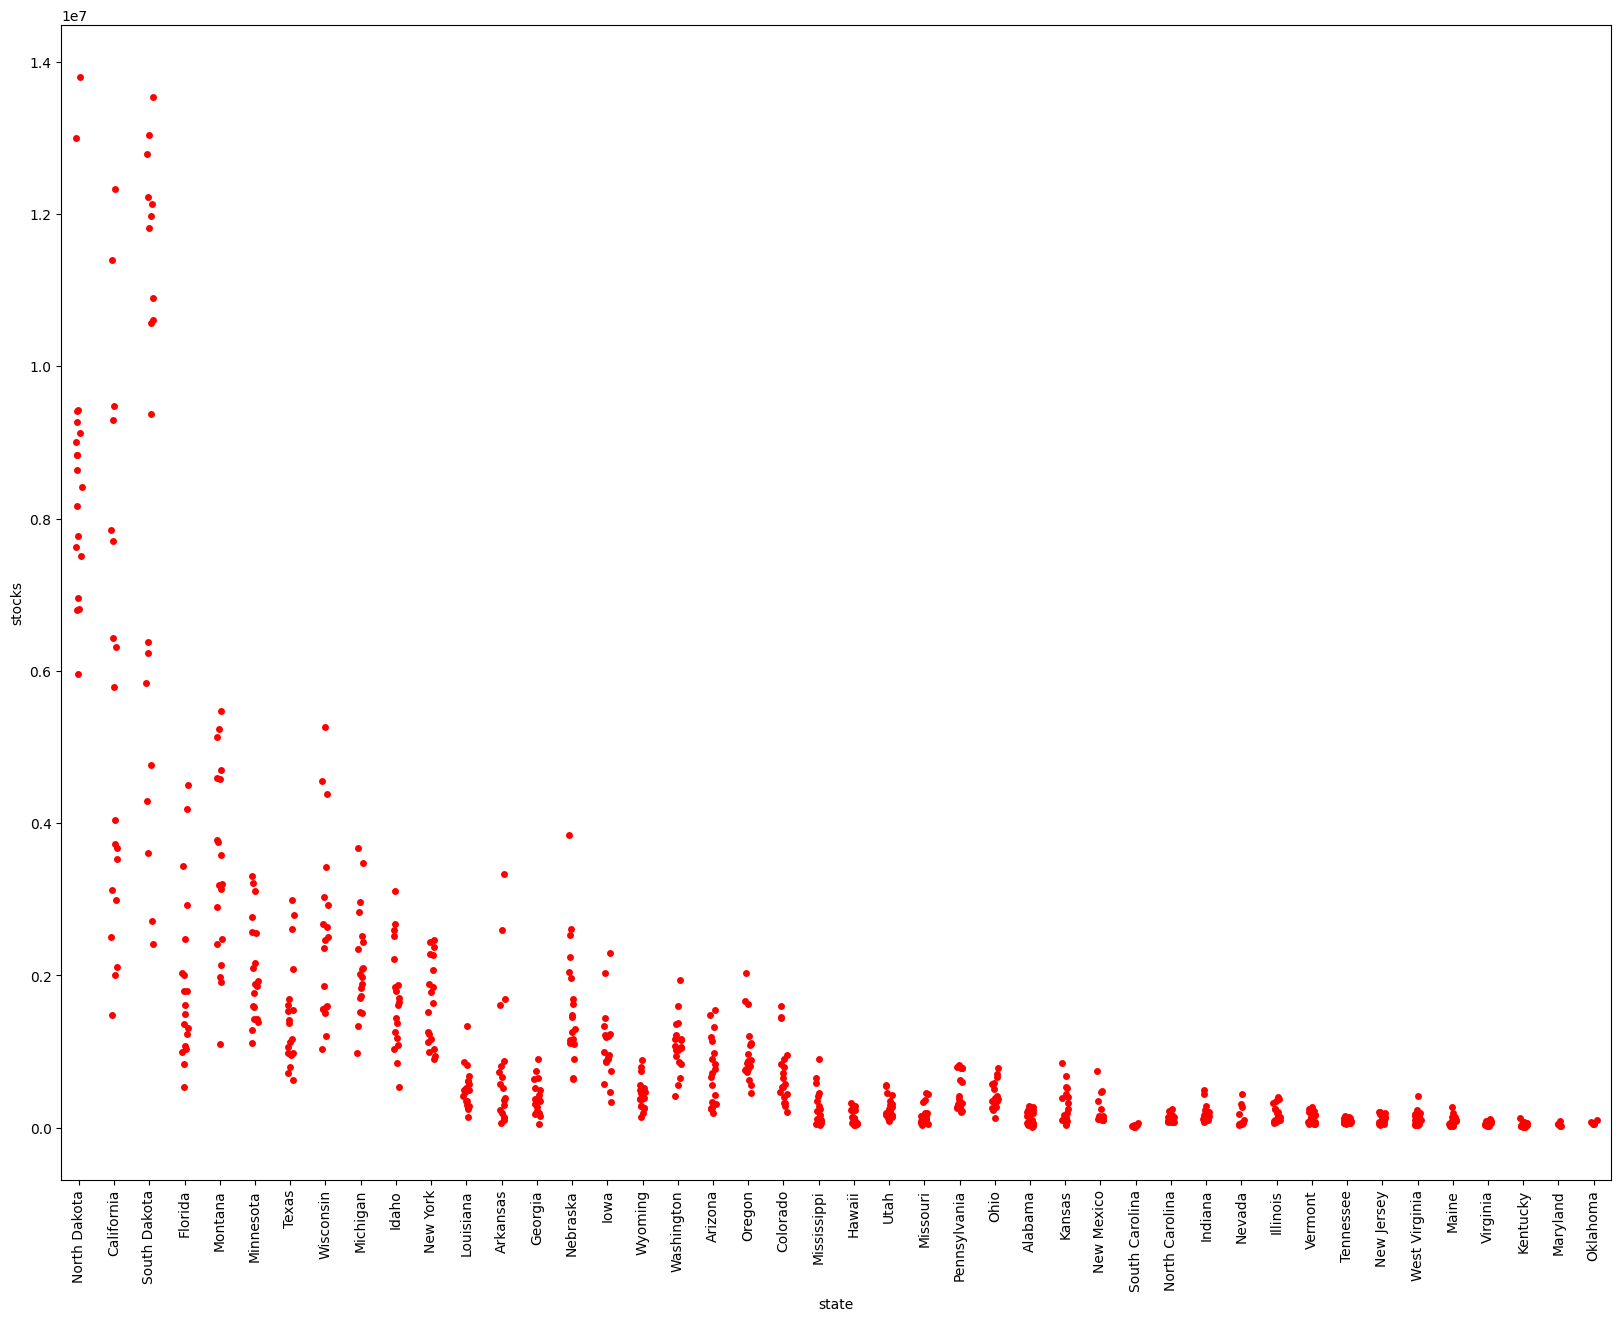

In [ ]:
plt.figure(figsize = (20,15)) # To resize the plot
# Plot stocks per state
sns.stripplot(x="state", y="stocks", data=honeyprod.sort_values("totalprod", ascending=False),
             color="r", jitter=True)

plt.xticks(rotation=90);

- *North Dakota has been able to sell more honey as compared to South Dakota despite having the highest production value*
- *Florida has the highest efficiency among the major honey-producing states*
- *Michigan is more efficient than Wisconsin in selling honey*

## Let's look at the average price per pound of honey across states

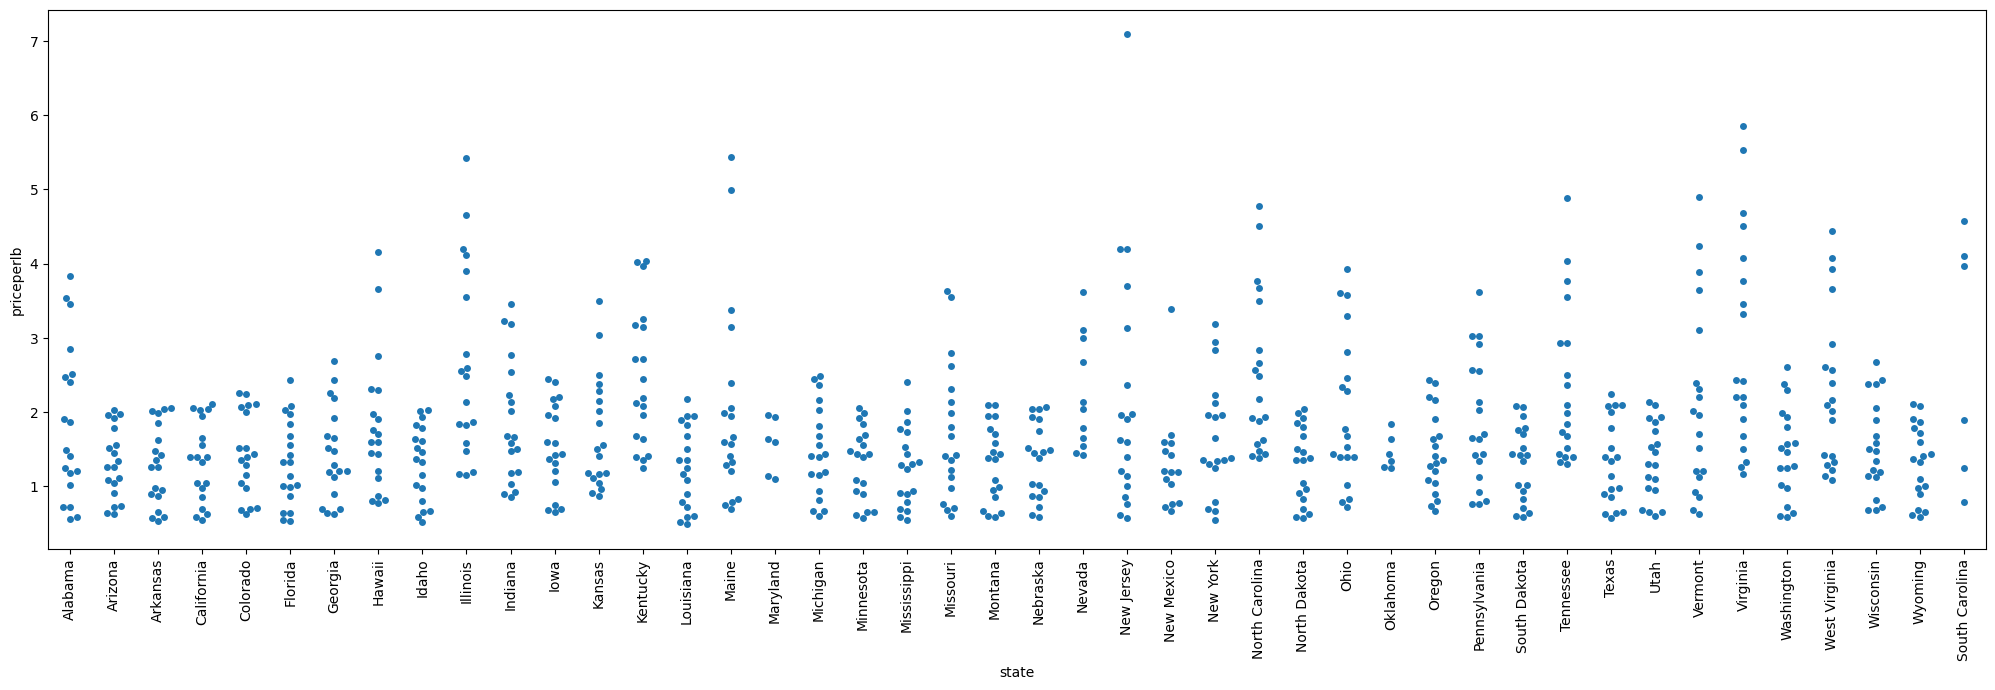

In [ ]:
plt.figure(figsize=(25, 7)) # To resize the plot
sns.swarmplot(data = honeyprod, x = "state", y = "priceperlb",
            )
plt.xticks(rotation=90);

- *Virginia has the highest price per pound of honey*
- *The average price per pound of honey in the major honey-producing states is towards the lower end*

## Conclusion



* *We can conclude that the total honey production has declined over the years whereas the value of production per pound has increased*
* *The reason for the declined honey production is the decrease in the yield per colony over the years*
* *The major honey-producing states are California, Florida, North Dakota, South Dakota and Montana*
* *Among these, Florida has been very efficient in selling honey*

# Happy Learning !

---